In [1]:
# importing necessary libraries

import sklearn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler


from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC 

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

df = pd.read_csv('titanic_train.csv')


In [3]:
# Display the first few rows of the dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Displaying basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Handling missing values

# For Age: fill missing values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# For Cabin: drop the Cabin column
df.drop(columns='Cabin', inplace=True)

# For Embarked: fill missing values with the most frequent embarkation point
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
# Computing the correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


Here are some observations from the correlation matrix:

There is a notable negative correlation between Pclass and Survived, indicating that passengers in higher classes (lower Pclass values) had a higher survival rate.

There is a positive correlation between Fare and Survived, suggesting that passengers who paid more had a higher survival rate.

Pclass and Fare have a strong negative correlation, as expected, since higher classes cost more.


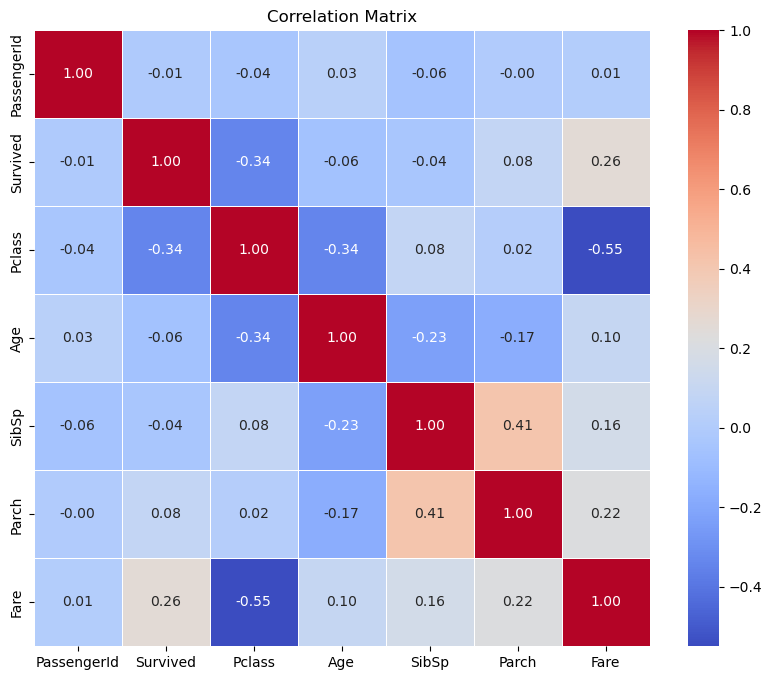

In [11]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

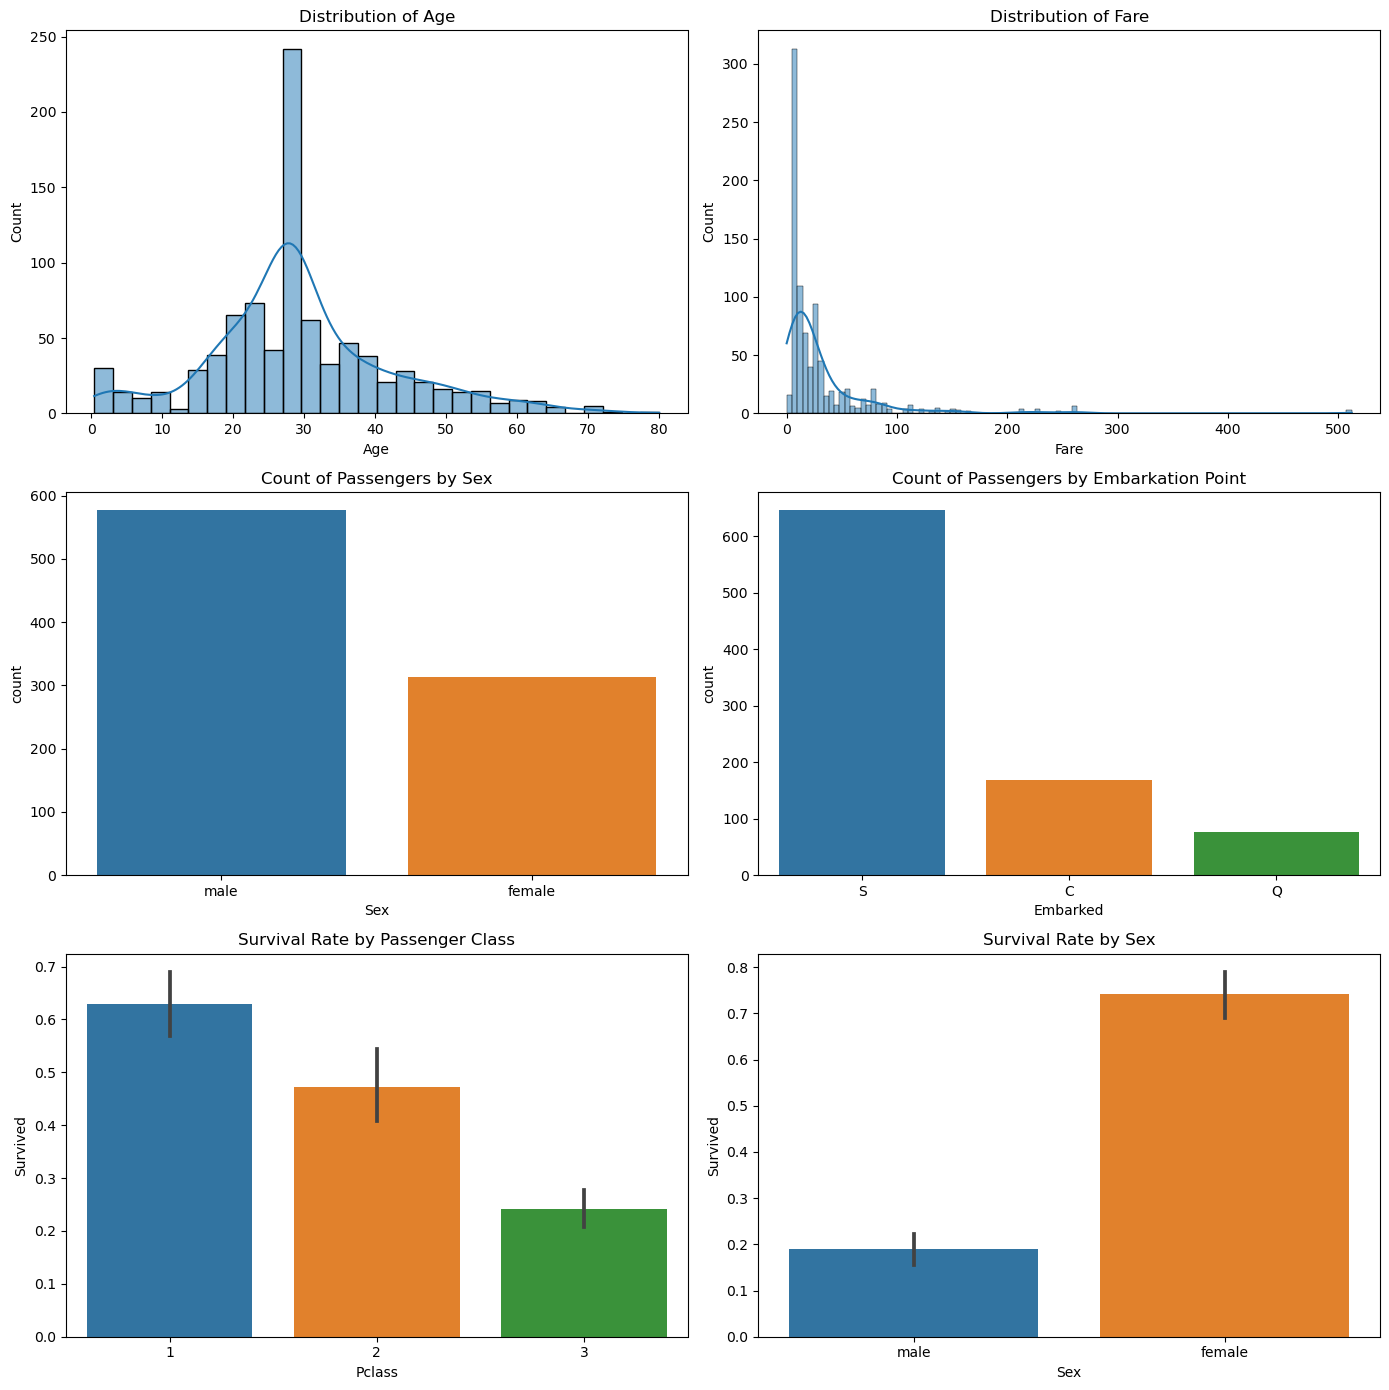

In [12]:

# Create a figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))

# Plot distribution of numerical variables
sns.histplot(data=df, x="Age", kde=True, ax=axes[0, 0])
sns.histplot(data=df, x="Fare", kde=True, ax=axes[0, 1])

# Plot count of categorical variables
sns.countplot(data=df, x="Sex", ax=axes[1, 0])
sns.countplot(data=df, x="Embarked", ax=axes[1, 1])

# Plot survival rate across different categories
sns.barplot(data=df, x="Pclass", y="Survived", ax=axes[2, 0])
sns.barplot(data=df, x="Sex", y="Survived", ax=axes[2, 1])

# Set the titles of the plots
axes[0, 0].set_title("Distribution of Age")
axes[0, 1].set_title("Distribution of Fare")
axes[1, 0].set_title("Count of Passengers by Sex")
axes[1, 1].set_title("Count of Passengers by Embarkation Point")
axes[2, 0].set_title("Survival Rate by Passenger Class")
axes[2, 1].set_title("Survival Rate by Sex")

# Adjust layout
plt.tight_layout()
plt.show()


Here's a summary of the visualizations:

Distribution of Age and Fare:

The distribution of age is slightly skewed to the right with a peak around the 20-30 age range.

The distribution of fare is heavily skewed to the right, indicating that a majority of passengers paid lower fares, with a few paying significantly higher fares.

Count of Passengers by Sex and Embarkation Point:

There are more male passengers than female passengers.

Most passengers embarked from Southampton, followed by Cherbourg, and then Queenstown.


Survival Rate by Passenger Class and Sex:

The survival rate is highest for 1st class passengers and lowest for 3rd class passengers.
Female passengers had a significantly higher survival rate than male passengers.

In [13]:
# Encoding categorical variables
# Encode Sex and Embarked columns

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # S: 2, C: 0, Q: 1


In [14]:
# Feature scaling
# Scale Age and Fare columns using StandardScaler 

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Check the first few rows of the cleaned and preprocessed dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2


Encoding Categorical Variables:

The Sex column was encoded as 1 for male and 0 for female.

The Embarked column was encoded as 0 for Cherbourg, 1 for Queenstown and 2 for Southampton.

In [15]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df['Survived']

# Splitting the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Checking the shape of the training and testing data
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((668, 7), (223, 7), (668,), (223,))

In [16]:

# Dictionary to hold the models and their respective evaluation metrics
model_metrics = {}

# List of models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVM", SVC(random_state=42)),
    ("KNN", KNeighborsClassifier())
]

# Training and evaluating each model
for model_name, model in models:
    # Training the model
    model.fit(X_train, y_train)
    
    # Making predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Storing the metrics in the dictionary
    model_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Converting the dictionary to a DataFrame for easier comparison
model_comparison = pd.DataFrame(model_metrics).T

model_comparison


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.807175,0.773810,0.730337,0.751445
Decision Tree,0.735426,0.670455,0.662921,0.666667
Random Forest,0.802691,0.758621,0.741573,0.750000
SVM,0.811659,0.783133,0.730337,0.755814
KNN,0.784753,0.715789,0.764045,0.739130


In [17]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Dictionary to hold the ensemble models and their respective evaluation metrics
ensemble_metrics = {}

# List of base models
base_models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVM", SVC(random_state=42, probability=True)),
    ("KNN", KNeighborsClassifier())
]

# Ensemble methods
ensemble_methods = [
    ("Bagging", BaggingClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

# Applying ensemble methods to each base model
for base_model_name, base_model in base_models:
    for ensemble_method_name, ensemble_method in ensemble_methods:
        # Setting the base model for the ensemble method
        if ensemble_method_name == "Bagging":
            ensemble_method.base_estimator = base_model
        
        # Model name
        model_name = f"{base_model_name} ({ensemble_method_name})"
        
        # Training the ensemble model
        ensemble_model = ensemble_method.fit(X_train, y_train)
        
        # Making predictions on the testing data
        y_pred = ensemble_model.predict(X_test)
        
        # Calculating evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Storing the metrics in the dictionary
        ensemble_metrics[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        }

# Converting the dictionary to a DataFrame for easier comparison
ensemble_comparison = pd.DataFrame(ensemble_metrics).T
ensemble_comparison


,Accuracy,Precision,Recall,F1 Score
Logistic Regression (Bagging),0.807175,0.767442,0.741573,0.754286
Logistic Regression (AdaBoost),0.789238,0.733333,0.741573,0.737430
Logistic Regression (Gradient Boosting),0.811659,0.797468,0.707865,0.750000
Decision Tree (Bagging),0.771300,0.702128,0.741573,0.721311
Decision Tree (AdaBoost),0.789238,0.733333,0.741573,0.737430
Decision Tree (Gradient Boosting),0.811659,0.797468,0.707865,0.750000
Random Forest (Bagging),0.816143,0.779070,0.752809,0.765714
Random Forest (AdaBoost),0.789238,0.733333,0.741573,0.737430
Random Forest (Gradient Boosting),0.811659,0.797468,0.707865,0.750000
SVM (Bagging),0.820628,0.802469,0.730337,0.764706
